<h1>Credit Card Defaults Exploratory Data Analysis</h1>

<h3>Bryan Bruno</h3>
<h3>Date: March 2019</h3>

<h3>Objective</h3>

I searched online to find publically available financial information. My search landed me on this dataset which contains credit default information. Aside from the dataset, the only information that has been provided are the explanations attached to the features. As such, I'll be treating this as an open ended analysis to gain more knowledge and familiarity with this information. Depending on the features, I may also proceed to create machine learning models and test their strengths as predictors.

<h3>Dataset Information</h3>

This publically available dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

<h3>Building Environment</h3>

In [54]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Credit_Card_dataset.csv") # load data into DataFrame

In [3]:
data.shape # get an idea of the dataset dimensions

(30000, 25)

In [4]:
data.isnull().values.any() # verify that DF has no missing values

False

<h3>EDA</h3>

Just by checking the dimensions and returning zero missing values, this dataset has probably already been preprocessed. Instead of doing a more thorough data integrity investigation, my EDA will be thorough enough to verify data cleanliness. My focus in this section is to better understand the provided information and identify important features.

In [55]:
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [56]:
data.tail()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996     -1  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997     -1  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
29995    5003.0    3047.0    5000.0    1000.0                           0  
29996    8998.0     129.0       0.0       0.0                           0  
29997   22000.0    4200.0    2000.0    3100.0                           1  
29998    1178.0    1926.0   52964.0    1804.0                           1  
29999    1430.0    1000.0    1000.0    1000.0                           1  

[5 rows x 25 columns]

In [57]:
data.sample(5)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
492    493   260000.0    1          2         2   30      0      0      0   
9120  9121   200000.0    1          2         2   32     -2     -2     -2   
5770  5771   180000.0    1          2         1   38      1      2      2   
8128  8129    30000.0    1          2         2   30      0      0      0   
8676  8677   480000.0    2          1         1   60     -1     -1     -1   

      PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
492       2  ...   108724.0    68500.0    69174.0    4000.0   11900.0   
9120     -2  ...      390.0      540.0      390.0    1473.0     390.0   
5770      0  ...     5071.0     5195.0        0.0    2000.0     200.0   
8128      0  ...    24082.0    17060.0        0.0    1703.0    1500.0   
8676      0  ...    67030.0    24334.0    28699.0   13736.0   96989.0   

      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
492      207.0    2003.0    2003.0    2003.0                           0  
9120     390.0     540.0     390.0       0.0                           0  
5770     500.0     124.0       0.0       0.0                           1  
8128    1000.0    1000.0       0.0       0.0                           0  
8676       4.0     241.0   15819.0   28966.0                           0  

[5 rows x 25 columns]

In [58]:
list(data)

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

<h3>Label Summary</h3>

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

In [9]:
data.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [269]:
print("Unknown: ", len(data[data.MARRIAGE == 0]), "|", round(len(data[data.MARRIAGE == 0])/len(data), 3))
print("Married: ", len(data[data.MARRIAGE == 1]), "|", round(len(data[data.MARRIAGE == 1])/len(data), 3))
print("Single: ", len(data[data.MARRIAGE == 2]), "|", round(len(data[data.MARRIAGE == 2])/len(data), 3))
print("Other: ", len(data[data.MARRIAGE == 3]), "|", round(len(data[data.MARRIAGE == 3])/len(data), 3))

Unknown:  54 | 0.002
Married:  13659 | 0.455
Single:  15964 | 0.532
Other:  323 | 0.011


In [271]:
print("Unknown 0: ", len(data[data.EDUCATION == 0]), "|", round(len(data[data.EDUCATION == 0])/len(data), 3))
print("Unknown 5: ", len(data[data.EDUCATION == 5]), "|", round(len(data[data.EDUCATION == 5])/len(data), 3))
print("Unknown 6: ", len(data[data.EDUCATION == 6]), "|", round(len(data[data.EDUCATION == 6])/len(data), 3))

Unknown 0:  14 | 0.0
Unknown 5:  280 | 0.009
Unknown 6:  51 | 0.002


<h3>Demographics Summary</h3>

* Average limit balance is 167,484 NTD - Highest limit 1M NTD and lowest 10K NTD. Note STD is massive: 129,748 NTD!
* Population is around 60% Females and 40% Males.
* Most have graduate or university level education.
* Around 53% of population is single, 46% married, and just over a percent "other" and "unknown."
* Ages range from 21 to 78 with an average of 35 years old.
* An average of around 22% credit card contracts will default the next month.

Based on the categorization method of PAY / BILL_AMT / PAY_AMT, the summary statistics above will not carry significance. Further investigation will need to be performed.

<h3>Data Review</h3>

There are a few strange findings here. As mentioned above, this dataset came with a provided explanation for the features. However, there are some unlabeled findings here. Education has a minimum of 0. This is not documented so we cannot know if this means an education level below high school or something else entirely. It should be considered the same as 5 and 6 - unknown. 

Marriage is labeled for 1, 2, and 3 yet it has a minimum of 0. Another unlabeled category that we cannot be certain about. Both of these unknowns consist of just over 1% of their respective categories. They're worth bringing up, but probably not worth removing.

Bringing up PAY / BILL_AMT / PAY_AMT again, they're supposed to have a minimum of -1. There is no mention of the -2. For the purpose of this exploration, I'm going to proceed with these values as is.

Lastly, I have no idea why the PAY_0 is a feature name. This was undoubtedly a mistype since it doesn't follow the naming conventions of the two other similar features. Fixing this below to avoid confusion past this point.

In [161]:
list(data)

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

<h3>Visualizing the Dataset</h3>

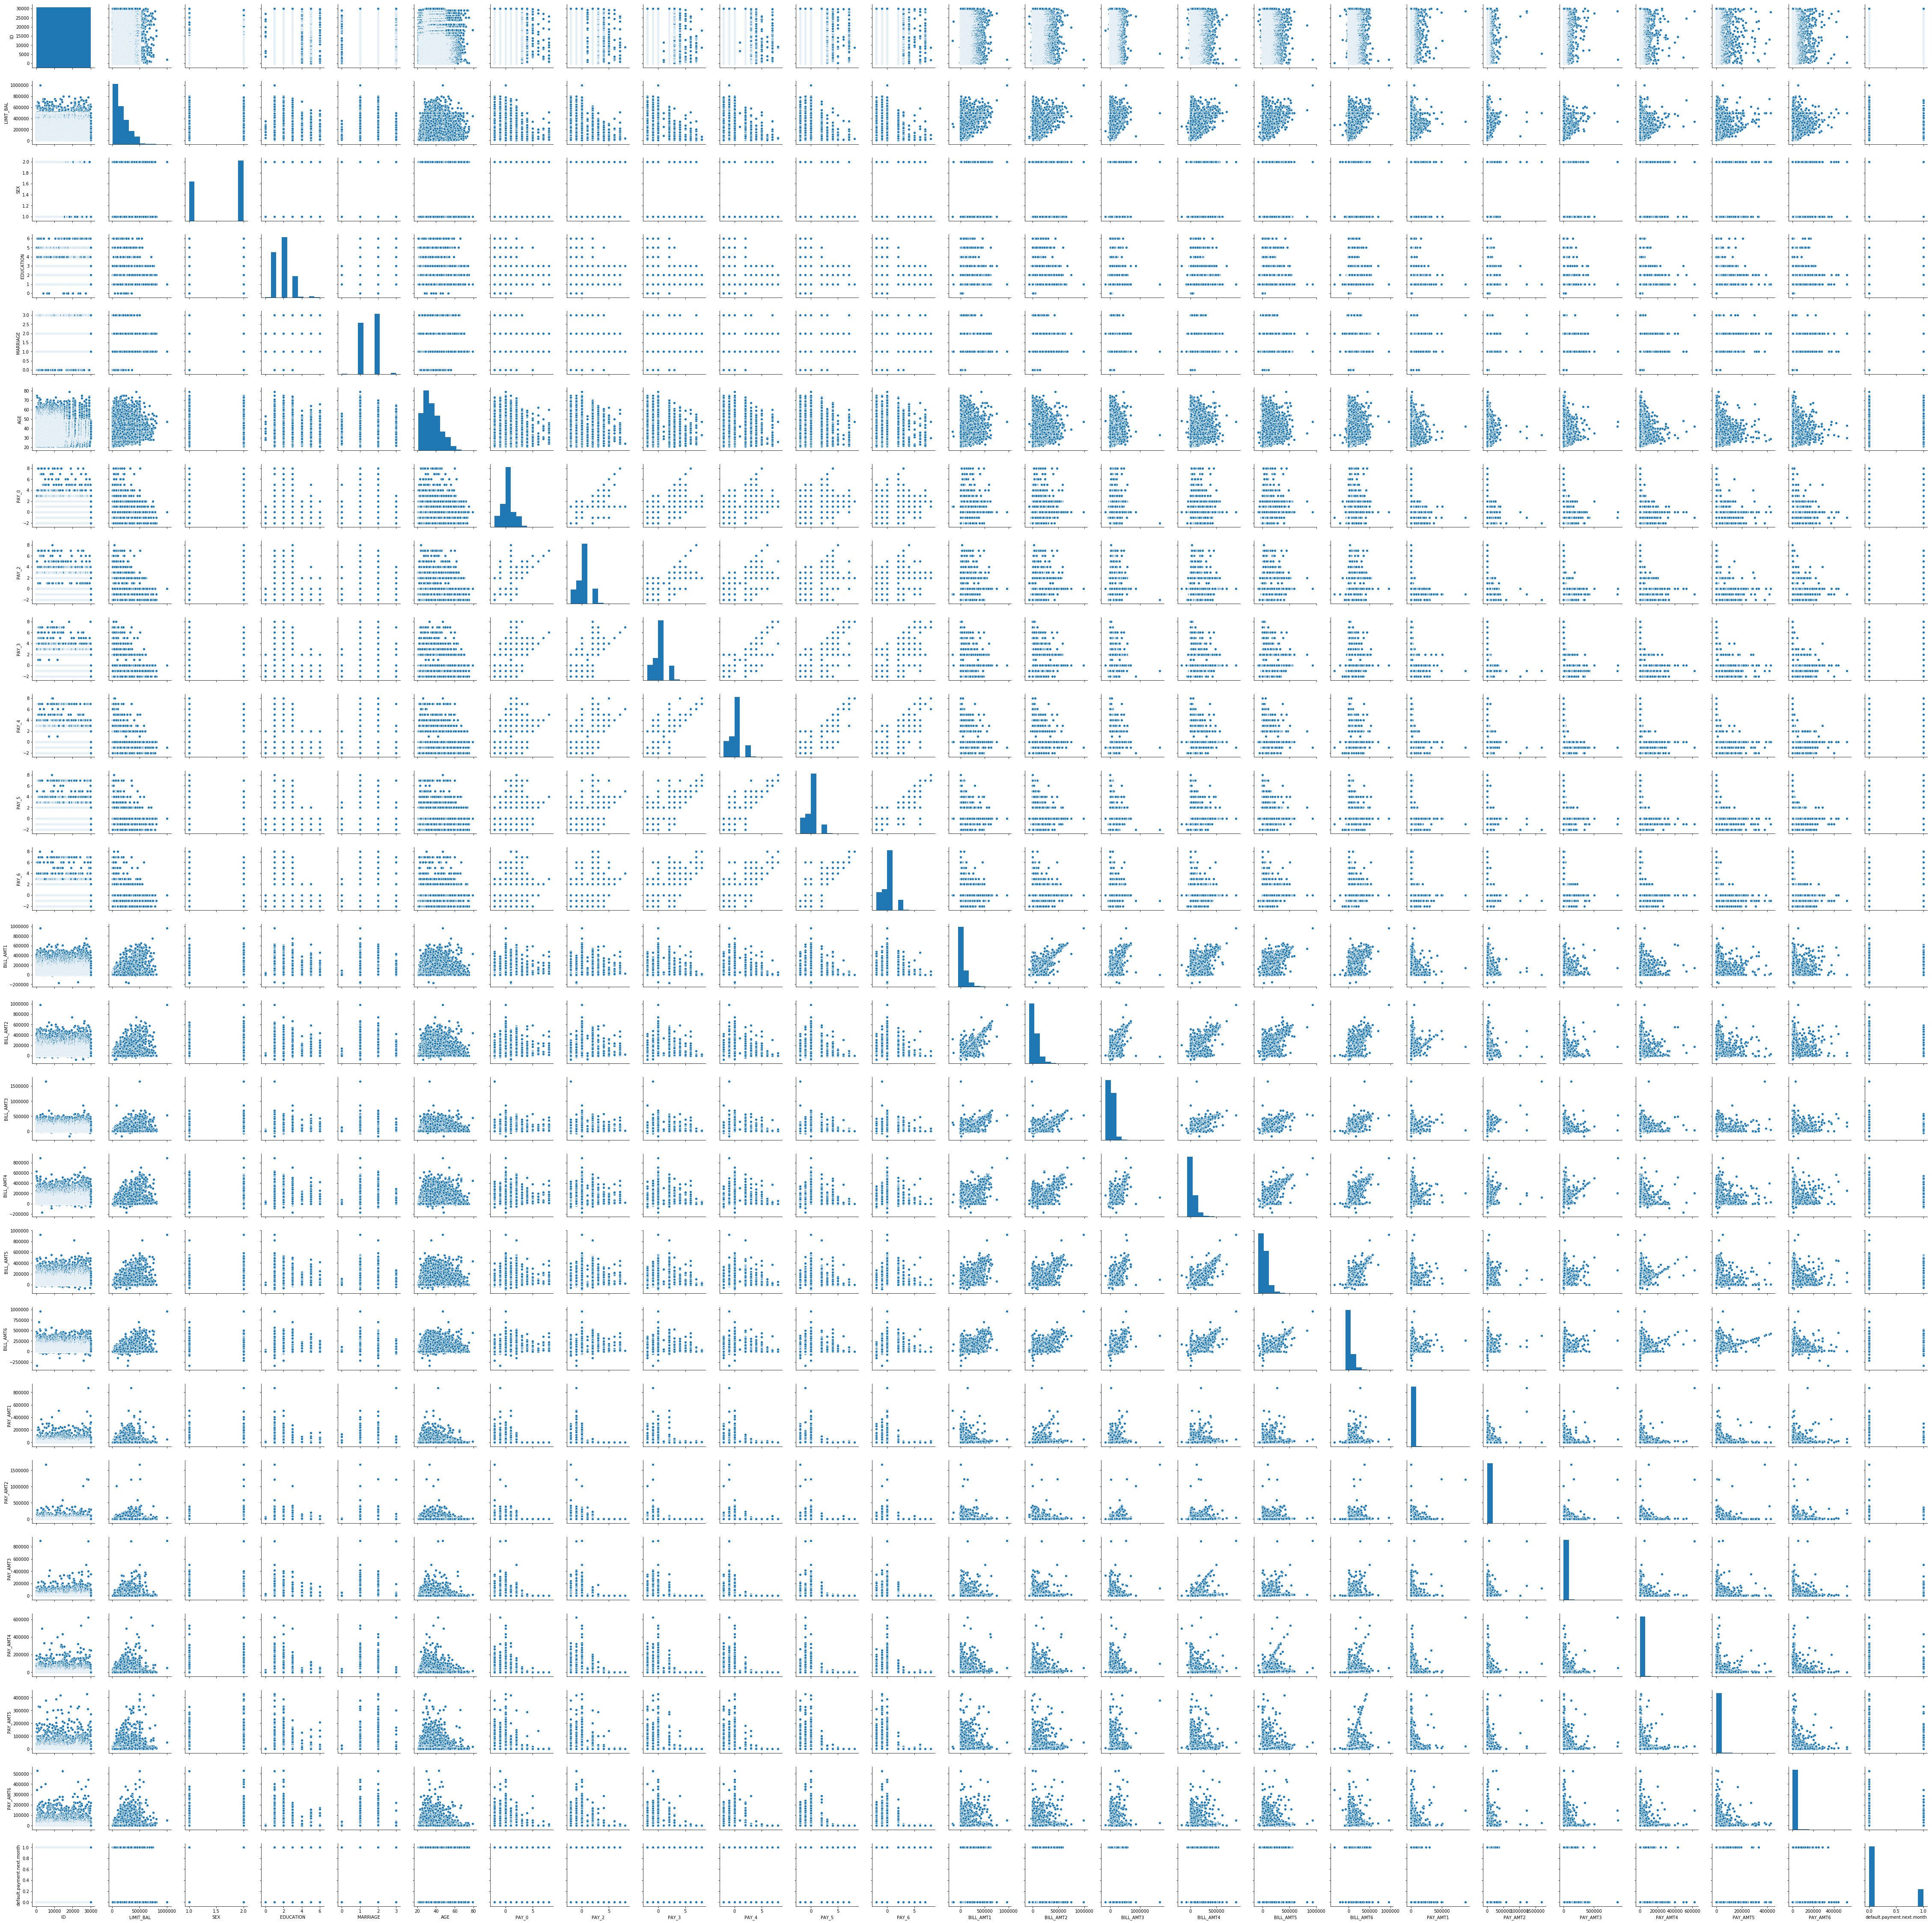

In [77]:
sns.pairplot(data)

Perhaps a bit much to look at first glance but there are some interesting patterns here. Let's focus in on some of these distributions while tying them back to the demographic statistics above.

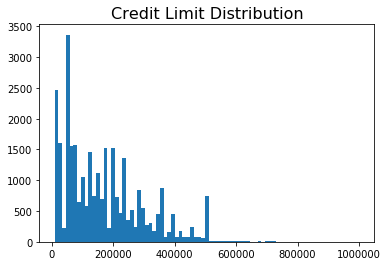

In [162]:
plt.hist(data["LIMIT_BAL"], bins = "auto")
plt.title("Credit Limit Distribution", fontsize = 16)
plt.show()

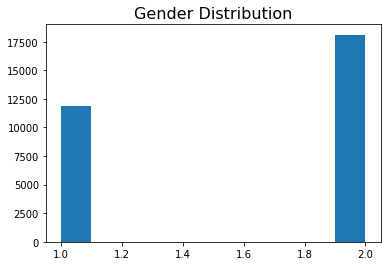

In [163]:
plt.hist(data["SEX"])
plt.title("Gender Distribution", fontsize = 16)
plt.show()

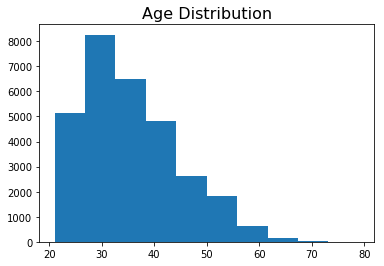

In [164]:
plt.hist(data["AGE"])
plt.title("Age Distribution", fontsize = 16)
plt.show()

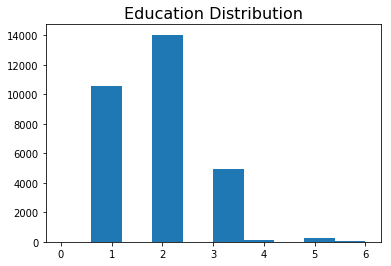

In [165]:
plt.hist(data["EDUCATION"])
plt.title("Education Distribution", fontsize = 16)
plt.show()

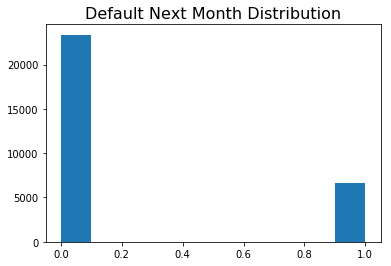

Default Next Month:  6636 | 0.221
Non-Default Next Month:  23364 | 0.779


In [166]:
plt.hist(data["default.payment.next.month"])
plt.title("Default Next Month Distribution", fontsize = 16)
plt.show()

print("Default Next Month: ", len(data[data["default.payment.next.month"] == 1]), "|",
      round(len(data[data["default.payment.next.month"] == 1])/len(data), 3))
print("Non-Default Next Month: ", len(data[data["default.payment.next.month"] == 0]), "|",
      round(len(data[data["default.payment.next.month"] == 0])/len(data), 3))

<h3>Correlation Heatmap</h3>

Defaulting is a major concern and something that needs to be further assessed. A correlation heatmap can offer us immediate detail. I'll use this to view the relationship strengths between defaulting and the other 24 features.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]), <a list of 25 Text yticklabel objects>)

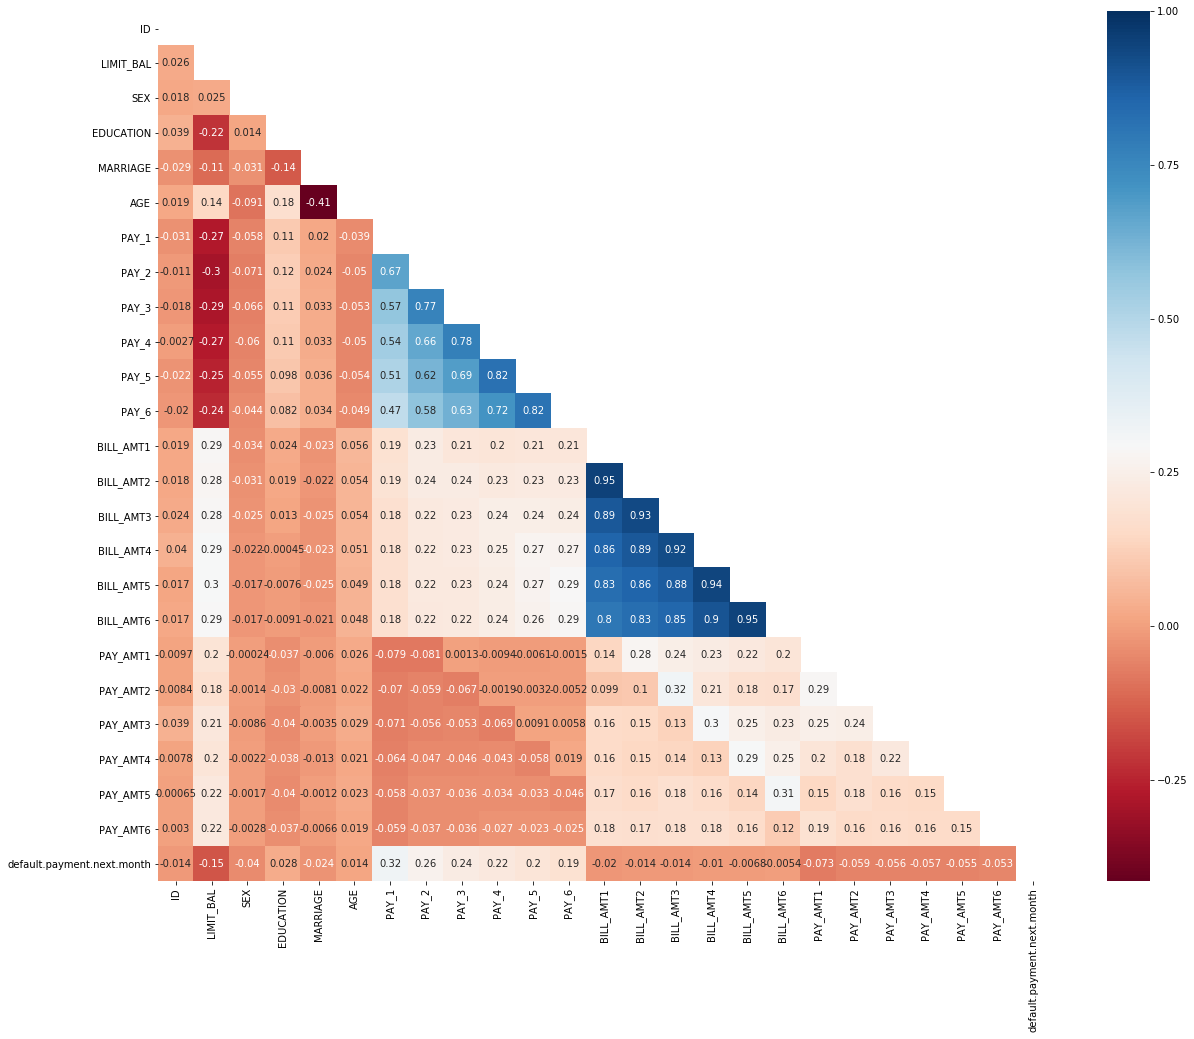

In [167]:
corr = data.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (20, 16))
sns.heatmap(corr, mask = mask, cmap = "RdBu", annot = True)
plt.yticks(rotation = 0)

Unfortunately, there are not any strong correlating relationships between the default category and the others. The standout correlation is PAY_1 among the other PAY features. This may still be used as a target; however, more data exploration should be conducted before building models and applying machine learning.

As an additional note - the relationships between nearly all features are weak. The exceptions are PAY and BILL_AMT when being applied to their same categories but in different months. Without using statistics or a formal analysis, this information holds up with common reasoning.

<h3>Visualizing Demographics by Pairing</h3>

This dataset provides different demographics and pairings that may be grouped and analyzed. It is worth the time to focus in on certain segmentations and compare their differences against one another. There may or may not be fluctuations between the results, but that is the primary focus of this. To observe, understand, and identify driving factors. To do this, I'll be using notched boxplots as an efficient visualization reference instead of numbers.

In [168]:
def boxplot_generator(category_a, category_b, category_c, plot_title, width):
    figure, ax1 = plt.subplots(ncols = 1, figsize = (width, 6))
    plt.title(plot_title, fontsize = 16)
    nbplot = sns.boxplot(ax = ax1, x = category_a, y = category_b, hue = category_c,
                         data = data, showfliers = False, palette = "Spectral")
    plt.show()

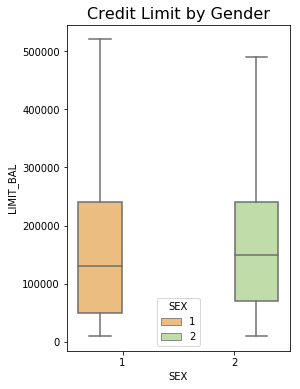

In [169]:
boxplot_generator("SEX", "LIMIT_BAL", "SEX", "Credit Limit by Gender", 4)

There are no statistically significant differences between gender and credit limits. Even with the larger female sample size, males have a slightly larger credit limit distribution. Females also have a slightly higher median credit limit. Again, based on gender, this population may be grouped together or removed completely when considering credit limits.

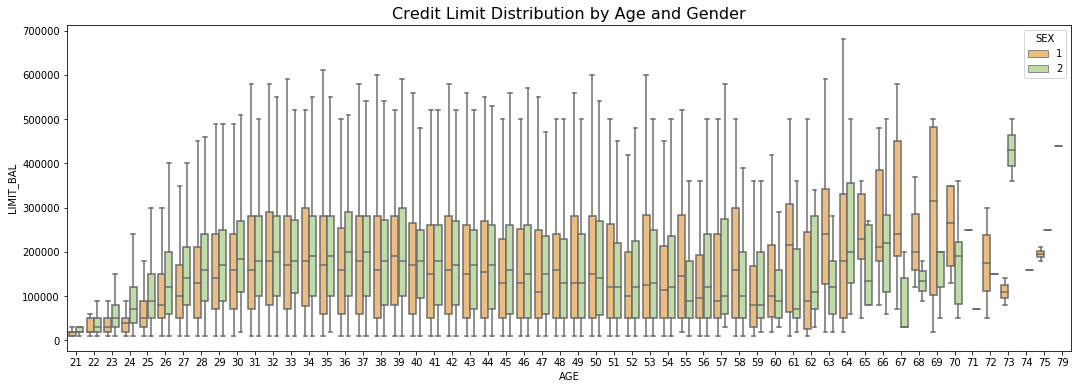

In [170]:
boxplot_generator("AGE", "LIMIT_BAL", "SEX", "Credit Limit Distribution by Age and Gender", 18)

In [171]:
print("Combined Ages below 25 and above 62: ", len(data[data.AGE < 25]) + len(data[data.AGE > 62]) , "|",
      round((len(data[data.AGE < 25]) + len(data[data.AGE > 62]))/len(data), 3))

Combined Ages below 25 and above 62:  2857 | 0.095


This more granular distribution by credit limit with consideration of gender and age confirms the statistical significance identified above. With ages added into the view, the notched boxes are incredibly close between genders. Ages 25 until 62 show statistical significance, but the younger and eldest ages provide greater variance. The extremes make up just under 10% of the total population. Moving forward we have the option to omit or keep them from model building. Since the variances are not likely large enough to drive serious issues, I’ll elect to retain them for now. Although if the models perform poorly, I may retry with them excluded. This also depends on the significance of credit limit feature importance.

<h3>Machine Learning for Predictions (Decision Tree Classifier)</h3>

After performing the EDA and getting a better feel of this data, it appears that the best use for this information is to develop machine learning models to predict credit defaults. This will naturally be the default.payment.next.month category and the rest of the data will be used as features. I’m going to exclude the ID field as it does not carry any significance to the categories. I’m also going to start by using a decision tree for classification. Decisions trees are very flexible and require very little to no data adaptation. For an initial classifier model, this will be a great place to start.

In [272]:
list(data) # just listing to copy and paste target and features

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [426]:
# removing ID from feature list 
target = "default.payment.next.month"
features = ["LIMIT_BAL",
            "SEX",
            "EDUCATION",
            "MARRIAGE",
            "AGE",
            "PAY_1",
            "PAY_2",
            "PAY_3",
            "PAY_4",
            "PAY_5",
            "PAY_6",
            "BILL_AMT1",
            "BILL_AMT2",
            "BILL_AMT3",
            "BILL_AMT4",
            "BILL_AMT5",
            "BILL_AMT6",
            "PAY_AMT1",
            "PAY_AMT2",
            "PAY_AMT3",
            "PAY_AMT4",
            "PAY_AMT5",
            "PAY_AMT6"]

In [427]:
X = data[features]
y = data[target]

In [428]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [429]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12) # 70/30 train test split

In [430]:
dtc = DecisionTreeClassifier(max_depth = 8, random_state = 12) 
dtc.fit(X_train, y_train)

preds = dtc.predict(X_test)
accuracy_score(y_test, preds)

0.8144444444444444

Using all the features and an out of the box decision tree classifier, we reached an 81.4% accuracy score. While this is definitely not a strong enough score for implementation purposes, it’s a decent start. The next steps are twofold. Let’s look at the feature importance before reruning the model and then work on some hyper parameter turning to get the most out of this model.

<h3>Feature Importances</h3>

In [431]:
featdf = pd.DataFrame({"Feature": features, "Feature Importances": dtc.feature_importances_})
featdf = featdf.sort_values(by="Feature Importances", ascending = False)
featdf

Feature  Feature Importances
5       PAY_1             0.557446
6       PAY_2             0.112068
19   PAY_AMT3             0.049800
11  BILL_AMT1             0.043816
0   LIMIT_BAL             0.037693
9       PAY_5             0.022754
4         AGE             0.016895
18   PAY_AMT2             0.016721
16  BILL_AMT6             0.015862
7       PAY_3             0.015718
17   PAY_AMT1             0.014828
22   PAY_AMT6             0.014526
21   PAY_AMT5             0.013705
15  BILL_AMT5             0.013391
12  BILL_AMT2             0.013092
10      PAY_6             0.009790
20   PAY_AMT4             0.008660
8       PAY_4             0.006320
14  BILL_AMT4             0.005721
13  BILL_AMT3             0.004376
2   EDUCATION             0.003134
3    MARRIAGE             0.001950
1         SEX             0.001734

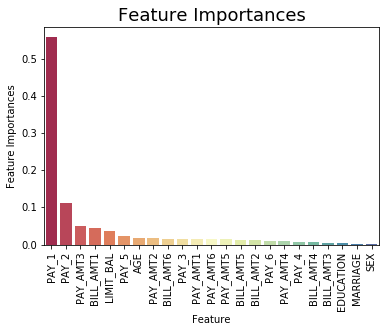

In [432]:
plt.title("Feature Importances", fontsize = 18)
f = sns.barplot(x = "Feature", y = "Feature Importances", data = featdf, palette = "Spectral")
f.set_xticklabels(f.get_xticklabels(), rotation = 90)
plt.show()

PAY_1 comes in with an importance of 56%! That’s quite a significant parameter. Just looking at the feature importance spread, the first two make up for an impressive amount of prediction power. I’m going to cut down on the number of features because they may be causing some overfitting of the model. I’ll focus on three and see if we can improve the model by that alone.

Another consideration is the level of importance these features have in relation to the EDA above. It was identified that variances based on gender yielded very minimal differences. Further, the gender category is dead last for prediction power.

In [433]:
target = "default.payment.next.month"
features = ["PAY_1", "PAY_2", "BILL_AMT1"] # limiting features to three

In [434]:
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

dtc = DecisionTreeClassifier(max_depth = 8, random_state = 12) 
dtc.fit(X_train, y_train)

preds = dtc.predict(X_test)
accuracy_score(y_test, preds)

0.817

Using the same model as above with just three features, the accuracy of our model improved by 0.3%. This is not a significant change, but it does tell us that we may use less features for this model moving forward. Since this is a one-off analysis, this doesn’t carry much weight, but while using information like this in a different situation, gathering data and developing similar models would be more streamlined. It would also require less computation time from querying and performance. This is much more impactful when datasets are millions in rows instead of the 30K in this.

<h3>Hyper Parameter Tuning</h3>

I’ll be performing a grid search next for hyper parameter tuning. The goal here is to push this model until we get the best performance out of it. If scores are still lacking, we can build a new model to compare performance.

In [385]:
from sklearn.model_selection import GridSearchCV

In [413]:
param_grid = {"max_depth": np.arange(1, 12), "criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5, 10, 20], "max_leaf_nodes": [4, 12, 20, 40]}

dtc_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 6, scoring= "accuracy")
dtc_search.fit(X_train, y_train)
dtc_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=12,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [414]:
dtc2 = DecisionTreeClassifier(class_weight = None, criterion = "gini", max_depth = 3,
                              max_features = None, max_leaf_nodes = 12, min_impurity_decrease = 0.0,
                              min_impurity_split = None, min_samples_leaf = 1,
                              min_samples_split = 2, min_weight_fraction_leaf = 0.0,
                              presort = False, random_state = 12, splitter = "best")

dtc2.fit(X_train, y_train)
preds = dtc2.predict(X_test)
accuracy_score(y_test, preds)

0.8186666666666667

Unfortunately our hyper parameter tuning only yields a fraction of a percent increase from before. At this point, we can consider this model with these features exhausted of performance. To clarify, there are still plenty of additional variations and parameters that may be tested. These features remain vanilla, and feature engineering may be conducted for significant performance. Best practice involves testing more models with these current features before conducting feature engineering. I will not be going into feature engineering for this dataset since the purpose of this EDA was to discover the story behind this information. This led us to creating predictive models in order to detect credit defaults.

<h3>Random Forest Classifier Starting with Hyper Parameters</h3>

Before concluding this EDA, let’s try a random forest classifier for predicting credit defaults. We’ll use the three features from above and start with a grid search for optimal parameters.

In [421]:
from sklearn.ensemble import RandomForestClassifier

In [439]:
param_grid = {"n_estimators": [100, 200, 400, 500], "criterion": ["entropy", "gini"], "class_weight" : ["balanced"]}

rfc_search = GridSearchCV(RandomForestClassifier(), param_grid, cv = 6, scoring = "accuracy")
rfc_search = rfc_search.fit(X_train, y_train)
rfc_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [442]:
rtc = RandomForestClassifier(bootstrap = True, class_weight = "balanced",
                             criterion = "gini", max_depth = None, max_features = "auto",
                             max_leaf_nodes = None, min_impurity_decrease = 0.0,
                             min_impurity_split = None, min_samples_leaf = 1,
                             min_samples_split = 2, min_weight_fraction_leaf = 0.0,
                             n_estimators = 100, n_jobs = None, oob_score = False,
                             random_state = 12, verbose = 1, warm_start = False)

rtc.fit(X_train, y_train)
preds = rtc.predict(X_test)
accuracy_score(y_test, preds)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.6864444444444444

<h3>Conclusion</h3>

I was hoping to end this EDA with a higher scoring model, but that just wasn’t the case. Given the two classifiers used, decision trees have a considerable accuracy performance over the random forest. Still, an accuracy score being in the 80% range is quite low for professional use. If applied as is, it would still provide greater insight than nothing at all, but is far from optimal.

There are two theoretical progressions from this point. We may ask about the data source or conduct an investigation on the labels to gain insight from the undefined data classifications. Alternatively, proceeding into a feature engineering analysis is the most realistic option. Further studying the relationship between the data provided will assist in developing better variables to increase model accuracy and overall performance. 